In [1]:
%matplotlib inline

##  Visualizing Top Features for Linear SVM with Yellowbrick

Redoing example in this [blog](https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d#.kcf2difm5) with Yellowbrick.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import os
import sys 
import numpy as np

# Modify the path 
sys.path.append("..")

import yellowbrick as yb 
import matplotlib.pyplot as plt 

In [5]:
from download import download_all 
from sklearn.datasets.base import Bunch

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "hobbies": os.path.join(FIXTURES, "hobbies")
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in text corpus by name.
    If download is specified, this method will download any missing files. 
    """
    
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
    
    # Read the directories in the directory as the categories. 
    categories = [
        cat for cat in os.listdir(path) 
        if os.path.isdir(os.path.join(path, cat))
    ]
    
    
    files  = [] # holds the file names relative to the root 
    data   = [] # holds the text read from the file 
    target = [] # holds the string of the category 
        
    # Load the data from the files in the corpus 
    for cat in categories:
        for name in os.listdir(os.path.join(path, cat)):
            files.append(os.path.join(path, cat, name))
            target.append(cat)
            
            with open(os.path.join(path, cat, name), 'r') as f:
                data.append(f.read())
        
    
    # Return the data bunch for use similar to the newsgroups example
    return Bunch(
        categories=categories,
        files=files,
        data=data,
        target=target,
    )

### Implementation from blog (adjusted for multiple target classes in 'hobbies' dataset)

In [9]:
def plot_coefficients(classifier, feature_names, target, top_features=20):
    # transform
    classes = list(set(target))
    classes.sort() # make sure target is sorted before fed to classifier
    cats, obs = classifier.coef_.shape
    for cat in range(0,cats):
        coefs = classifier.coef_[cat]
        top_positive_coefficients = np.argsort(coefs)[-top_features:]
        top_negative_coefficients = np.argsort(coefs)[:top_features]
        top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

        # draw method
        plt.figure(figsize=(15, 5))
        colors = ['red' if c < 0 else 'blue' for c in coefs[top_coefficients]]
        plt.bar(np.arange(2 * top_features), coefs[top_coefficients], color=colors)
        feature_names = np.array(feature_names)
        plt.title(classes[cat])
        plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
        
        plt.show()

In [10]:
corpus = load_data('hobbies')
data = corpus.data
target = corpus.target

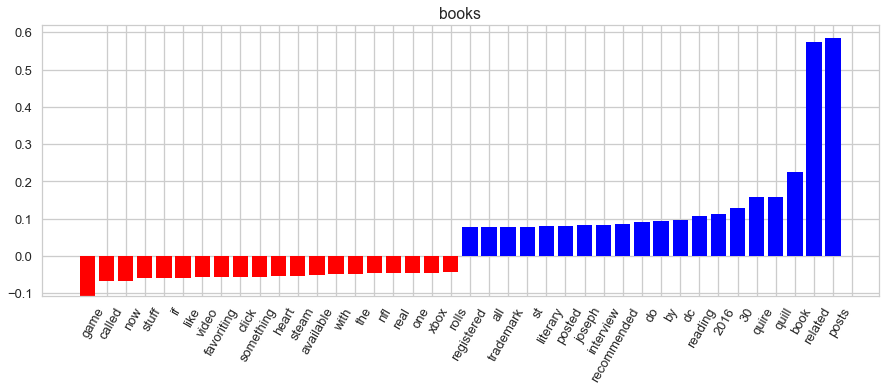

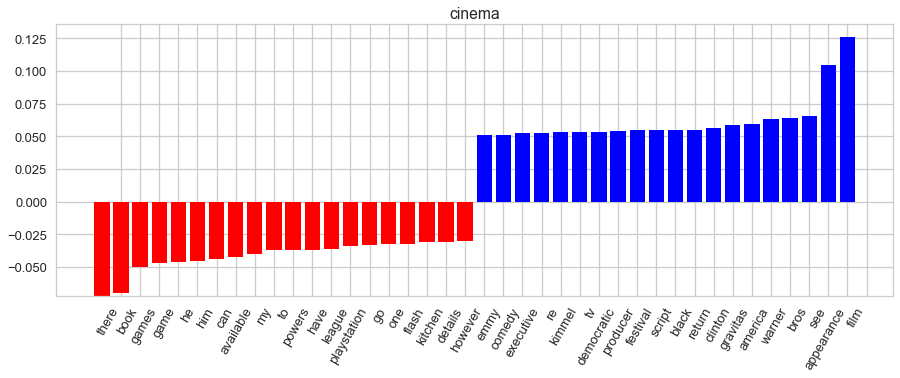

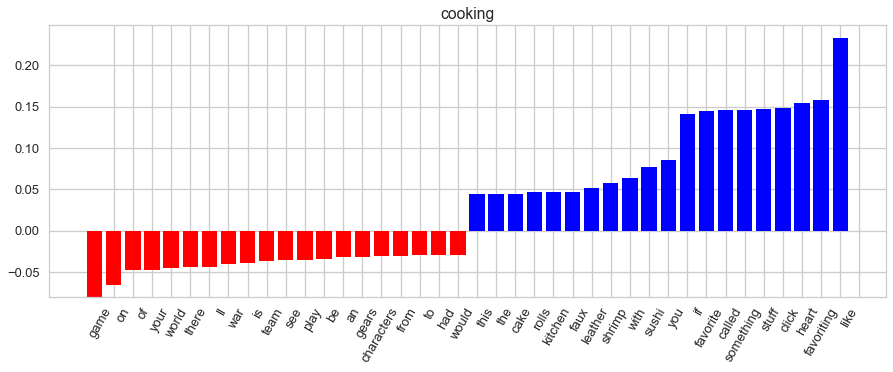

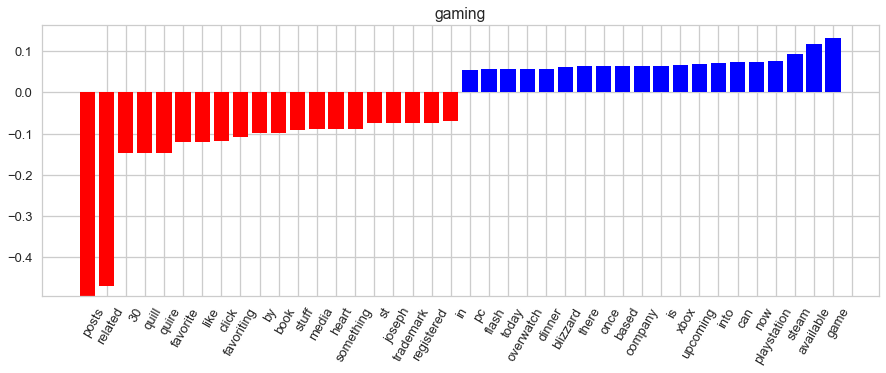

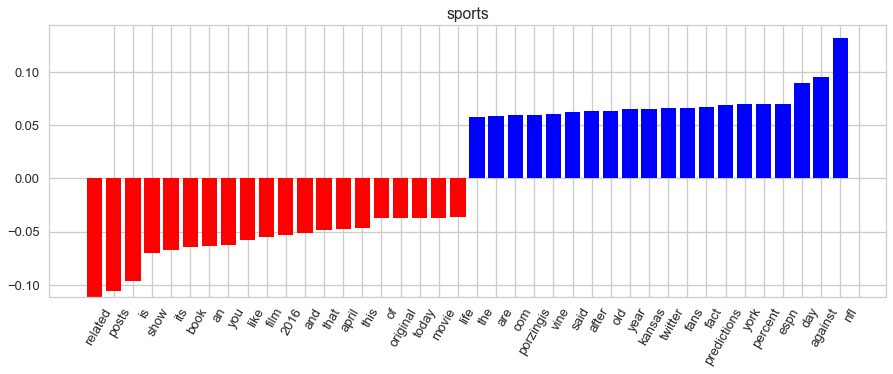

In [11]:
cv = CountVectorizer()
cv.fit(data)

X_train = cv.transform(data)

svm = LinearSVC()
svm.fit(X_train, target)

plot_coefficients(svm, cv.get_feature_names(), target)

### Yellowbrick Top Features Visualizer Demo

In [12]:
corpus = load_data('hobbies')
data = corpus.data
target = corpus.target
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(data)
X_train = vectorizer.transform(data)
svm = LinearSVC()
features = vectorizer.get_feature_names()
classes = list(set(target))
classes.sort() # this is important, otherwise graph titles will not be accurate

In [1]:
from top_features import TopFeaturesVisualizer

/Users/ayo/projects/yellowbrick/venv3/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


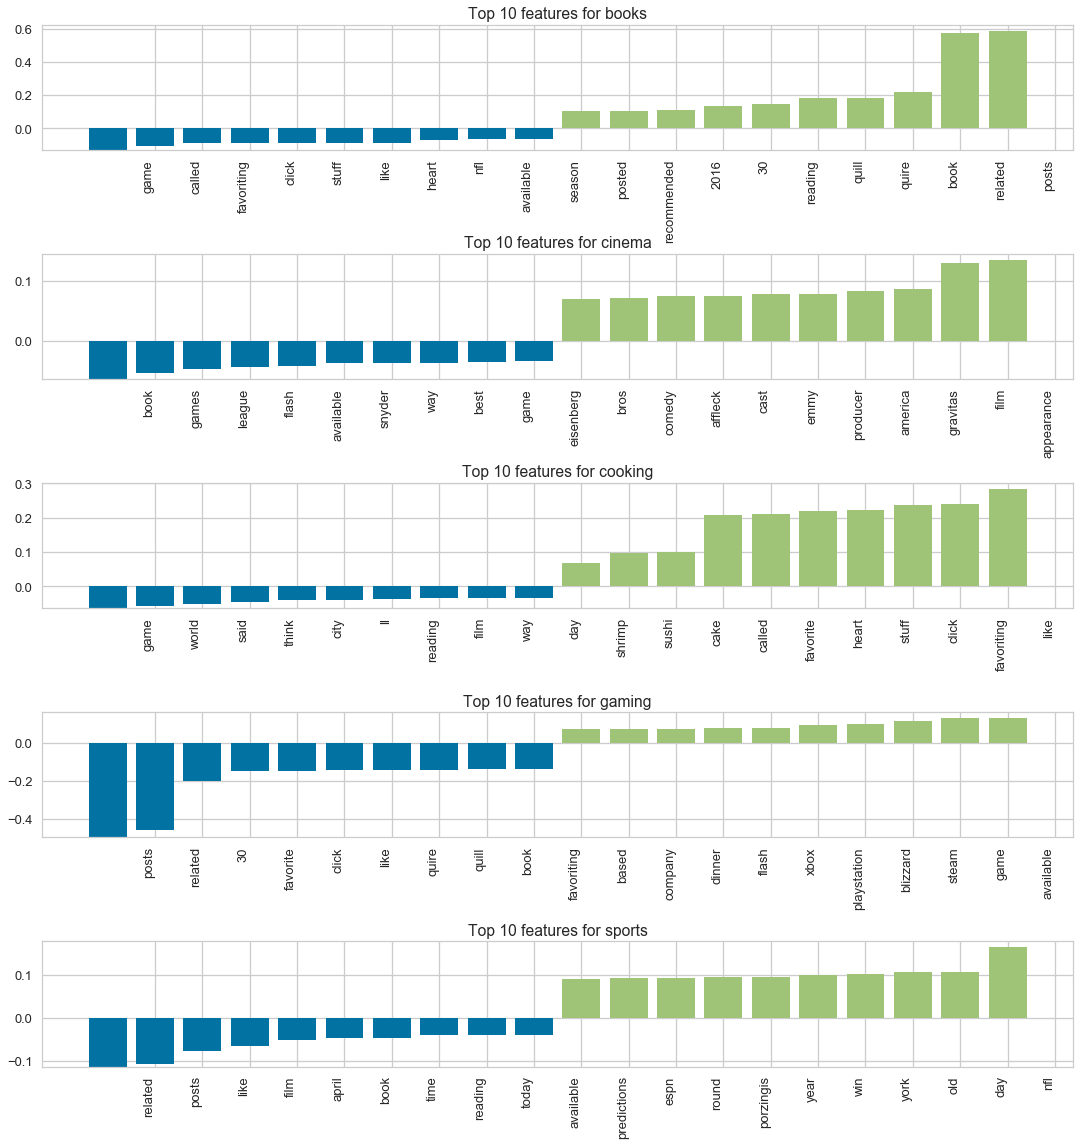

In [14]:
fig, ((axa, axb, axc, axd, axe)) =  plt.subplots(5, sharex=False, sharey='row', figsize=(15,15))
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)

for label, ax in zip(classes, (axa, axb, axc, axd, axe)):
    visualizer = TopFeaturesVisualizer(svm, ax=ax, N=10, classes=classes)
    visualizer.fit(X_train, target)
    visualizer.score(class_label=label, features=features)

visualizer.poof()